<a href="https://colab.research.google.com/github/ViratCh04/Liver-Disease-Analysis/blob/main/Liver_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
%ls

drive/  sample_data/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

### Data Analysis
We will now read the dataset and then perform some analysis to derive proper features and draw correlations wherever possible

In [ ]:
df = pd.read_csv('drive/MyDrive/datasets/indian_liver_patient.csv')
#print(df.columns.values)
# Creating another dataframe for visualisation purposes
df1 = pd.DataFrame(df)
df1 = df1.rename(columns = {'Dataset' : 'Diseased'})
df1['Diseased'] = np.where(df1['Diseased'] == 2, 0, df1['Diseased'])

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Gathering information on data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
# checking for NaN values
df[df.isna().any(axis = 1)]
# Dropping NaN values
df = df.dropna()

### Some conversions
Changing how the data is formatted for the last column "Dataset", to indicate its function properly- which is to show if the patient carries a Liver Disease or not. Changing the value of Diseased feature(categorical) to 0 indicates patients who are not having any liver disease.
Also going to have to convert males to 0 int value and females to 1

In [ ]:
df = df.rename(columns = {'Dataset' : 'Diseased'})
df['Diseased'] = np.where(df['Diseased'] == 2, 0, df['Diseased'])
df['Gender'] = np.where(df['Gender'] == 'Male', 0, df['Gender'])
df['Gender'] = np.where(df['Gender'] == 'Female', 1, df['Gender'])

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diseased
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#df.isnull().sum()
df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diseased
count,579.000000,579.0,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
unique,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.782383,NaN,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,NaN,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000


## Visualisations for drawing better understanding of data at work

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


<Axes: xlabel='Diseased', ylabel='count'>

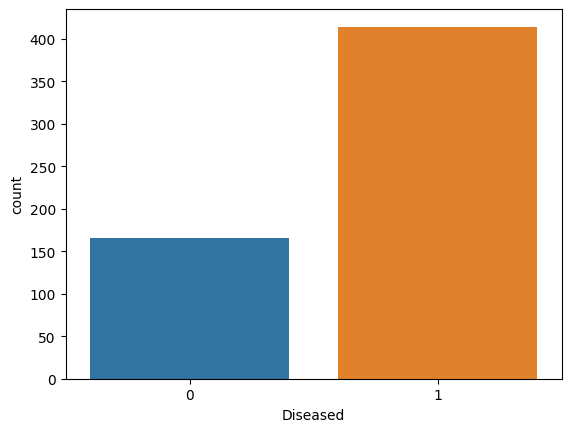

In [ ]:
LD, NLD = df1['Diseased'].value_counts()
print('Number of patients diagnosed with liver disease: ', LD)
print('Number of patients not diagnosed with liver disease: ', NLD)
sns.countplot(data=df, x='Diseased',label='Count')

The orange bar shows the total number of patients with liver disease while the blue bar shows the number of people not afflicted with any sort of liver disease.

<Axes: xlabel='Gender', ylabel='count'>

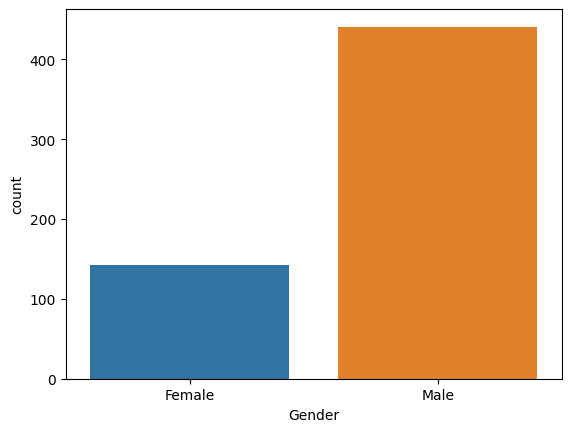

In [ ]:
sns.countplot(data = df1, x = 'Gender', label='Count')

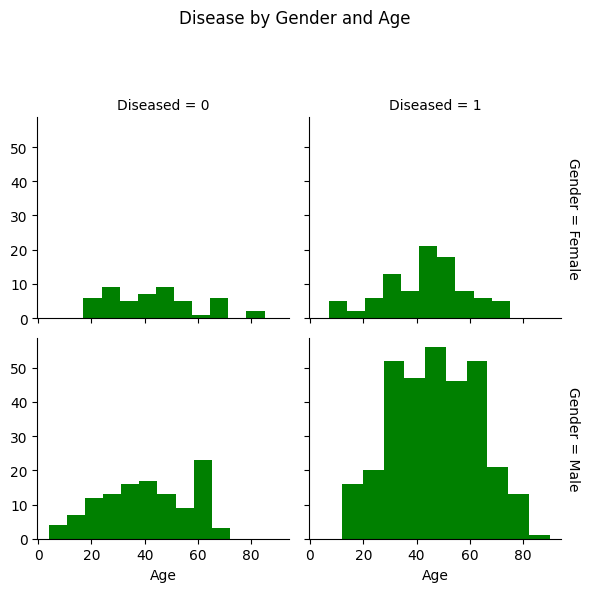

In [ ]:
g = sns.FacetGrid(df1, col="Diseased", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="green")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Disease by Gender and Age');

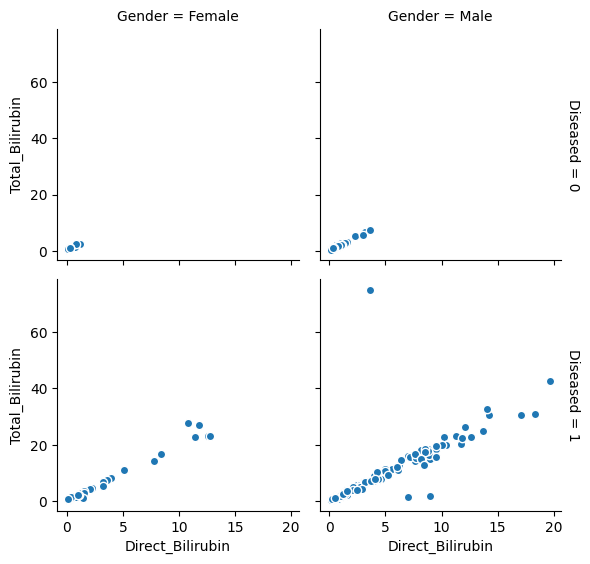

In [ ]:
g = sns.FacetGrid(df1, col="Gender", row="Diseased", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

As can be see, every liver patient has high amounts of both kinds of Bilirubin in them, which suggest a safe limit inside patients until it gets exceeded which indicates towards causing a liver disease.

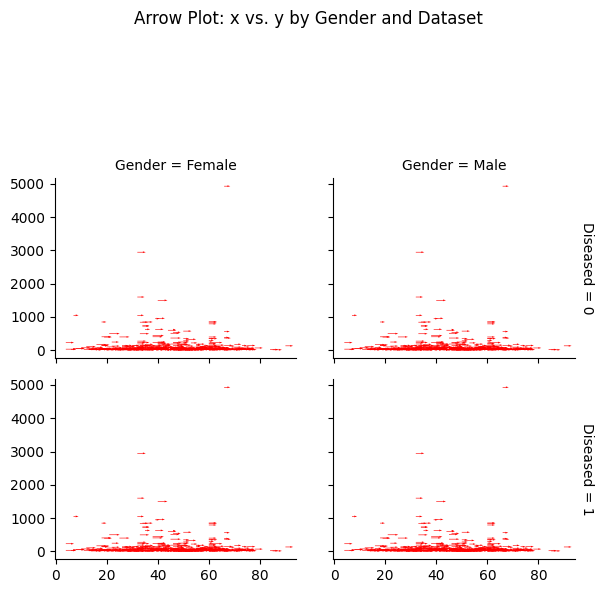

In [ ]:
g = sns.FacetGrid(df1, col="Gender", row = "Diseased", margin_titles = True)

x = df1['Age']
y = df1['Aspartate_Aminotransferase']
dx = df1['Albumin']

# Generate random data for dy (assuming you want to have some variation)
dy = np.random.rand(len(df1))

for ax in g.axes.flat:
    ax.quiver(x, y, dx, dy, color='red', angles='xy', scale_units='xy', scale=1)

# Adjust the layout
plt.subplots_adjust(top=0.7)

# Add a title to the entire grid
g.fig.suptitle('Arrow Plot: x vs. y by Gender and Dataset')

# Show the plot
plt.show()

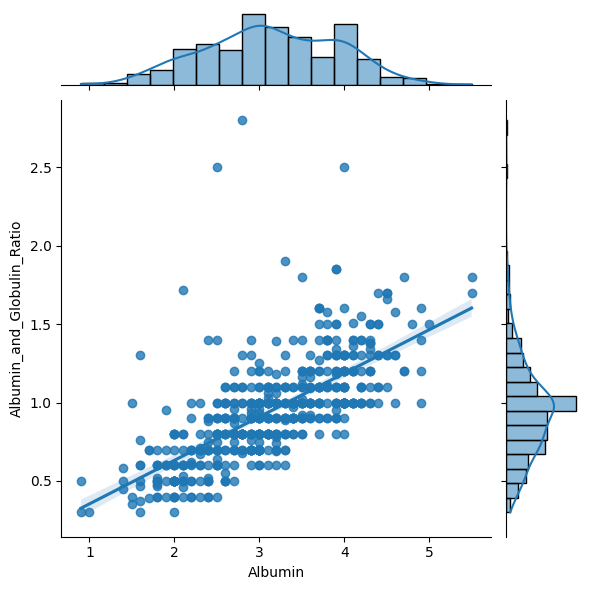

In [ ]:
sns.jointplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df1, kind="reg")

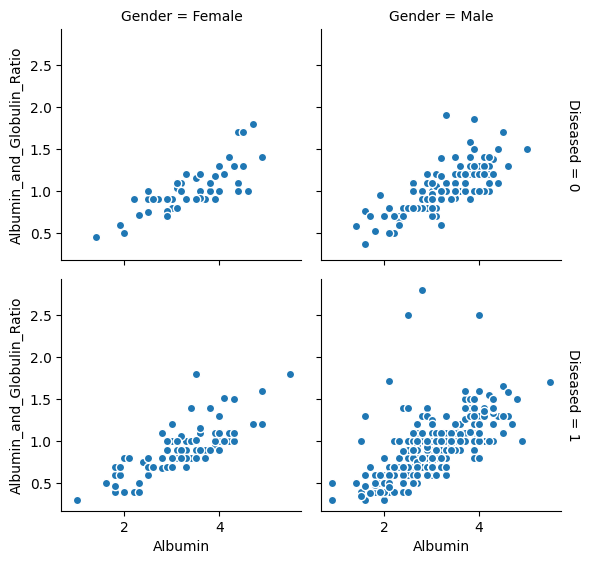

In [ ]:
g = sns.FacetGrid(df1, col="Gender", row="Diseased", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Feeling it more and more prudent to remove certain outliers to maximise efficiency of the prediction model in the latter half of notebook.

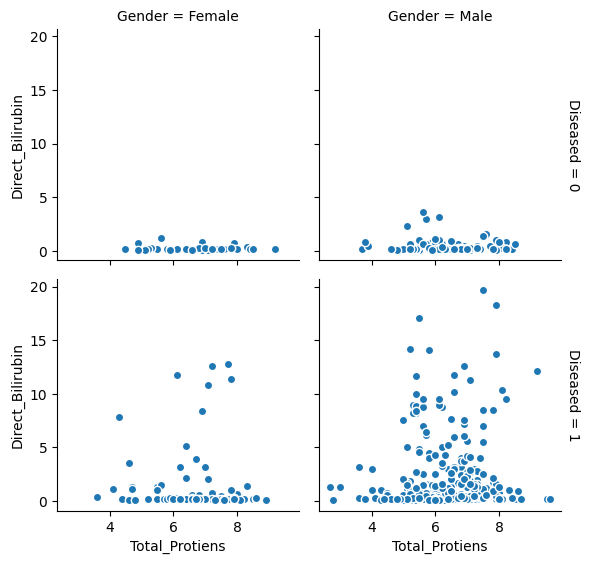

In [ ]:
g = sns.FacetGrid(df1, col="Gender", row="Diseased", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Direct_Bilirubin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

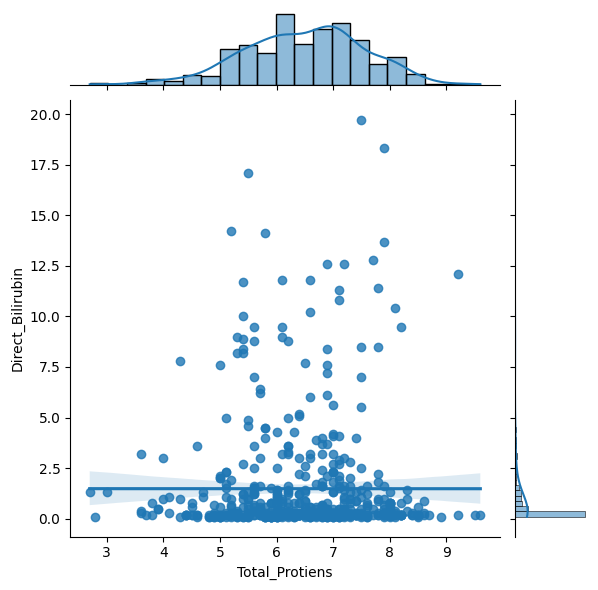

In [ ]:
sns.jointplot(x="Total_Protiens", y="Direct_Bilirubin", data=df1, kind="reg")

In [ ]:
"""
  We can also add in dummy data to boost processing of the data into our models and enhance their performances, suggested by Gursimar.
"""

'\n  We can also add in dummy data to boost processing of the data into our models and enhance their performances, suggested by Gursimar.\n'

### Knowing what is what
On further research from the internet in search of relevant features, we saw that Bilirubin is a pigment whose higher levels may indicate liver problems(direct bilirubin is the form excreted in bile). Similarly, the same is true for Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase(for liver injury). Meanwhile, a low albumin(protein) count may also indicate a liver disorder. Thus, an A/G test detects the total amount of protein in your blood, the normal range for albumin/globulin ratio is around 1-2. It is also true that protein deficiency is often associated with liver diseases as well, as such one can safely conclude that all features correlate to whether the patient has a liver disease or not.

## Dimensionality Reduction
This is being done in order to increase our accuracy as a high number of attributes/features leads to a decrease in accuracy when it comes to predicting labels of the dataset. We are going to use Principal Component Analysis for the former reason (and better visualization) while splitting datasets for training and testing purposes- we are just going to import the library functions for now.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating Training and Testing datasets
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

columns = list(df.keys())

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 12)

# Performing Dimensionality Reduction

# Scale data before applying PCA
scaling = StandardScaler()
scaling.fit(xTrain)
scaledData = scaling.transform(xTrain)

scaling.fit(xTest)
scaledData2 = scaling.transform(xTest)

principal = PCA(n_components=3)

principal.fit(scaledData)
xTrain = principal.transform(scaledData)
# Checking dimensions post reduction in dimensions
print(xTrain.shape)

principal.fit(scaledData2)
xTest = principal.transform(scaledData2)
print(xTest.shape)


(463, 3)
(116, 3)


## Modelling and Predicting Liver Disease Status
We are going to keep adding new algorithms until we find one which finally meets our benchmark accuracy. Some of them are going to be:
- Linear Regression
- Logistic Regression
- kNN
- Random Forest
- Naive Bayes
- Support Vector Machines
- Perceptrons (admittedly, I am not well versed with these)


### Importing library classifier functions


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
logRegression = LogisticRegression(max_iter = 600)
logRegression.fit(xTrain, yTrain)
#yPredictions = logRegression.predict(xTest)
accLogReg = round(logRegression.score(xTest, yTest) * 100, 2)
accLogReg

75.0

In [ ]:
svc = SVC()
svc.fit(xTrain, yTrain)
#yPredictions = svc.predict(xTest)
accSvc = round(svc.score(xTest, yTest) * 100, 2)
accSvc

74.14

In [ ]:
linRegression = LinearRegression()
linRegression.fit(xTrain, yTrain)
#yPredictions = linRegression.predict(xTest)
accLinReg = round(linRegression.score(xTest, yTest) * 100, 2)
accLinReg
# wow

8.53

The accuracy given by the Linear Regression model itself is so baffling that I am just going to dedicate an entire text block to express my amazement at the figure.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xTrain, yTrain)
accKnn = round(knn.score(xTest, yTest) * 100, 2)
accKnn

62.07

In [ ]:
perceptron = Perceptron()
perceptron.fit(xTrain, yTrain)
accPerceptron = round(perceptron.score(xTest, yTest) * 100, 2)
accPerceptron

69.83

In [ ]:
sgd = SGDClassifier()
sgd.fit(xTrain, yTrain)
accSgd = round(sgd.score(xTest, yTest) * 100, 2)
accSgd

73.28

In [ ]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(xTrain, yTrain)
accDT = round(decisionTree.score(xTest, yTest) * 100, 2)
# Oddly gives an accuracy of 100 % with training data
accDT

65.52

In [ ]:
linearSvc = LinearSVC(max_iter = 700)
linearSvc.fit(xTrain, yTrain)
accLinSvc = round(linearSvc.score(xTest, yTest) * 100, 2)
accLinSvc

75.86

In [ ]:
randomForest = RandomForestClassifier(n_estimators = 80)
randomForest.fit(xTrain, yTrain)
accRF = round(randomForest.score(xTest, yTest) * 100, 2)
accRF

71.55

## Model Evaluation
We are now going to rank our accuracies of all the models for evaluation to choose the one which works the best for our dataset/problem. The winner seems to be clear although we are not exactly happy with the accuracy.

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Linear Regression', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [accSvc, accKnn, accLogReg,
              accRF, accLinReg, accPerceptron,
              accSgd, accLinSvc, accDT]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Linear SVC,75.86
2,Logistic Regression,75.00
0,Support Vector Machines,74.14
6,Stochastic Gradient Decent,73.28
3,Random Forest,71.55
5,Perceptron,69.83
8,Decision Tree,65.52
1,KNN,62.07
4,Linear Regression,8.53


## End term analysis:

After further testing and reduction in dimensions the improvements were only marginal, nonetheless some models swapped rankings in terms of accuracy pretty quickly.

Further testing and modifications are required in order to more accurately determine whether the patient is afflicted with a liver disease or not. First thing I will be doing to improve the model is to immediately determine if gender roles play a role in people with liver inflictions or not. This being our first proper data science project, we tried what we could do with our meagre skillset- but doing this project has further encouraged us to do more and more analysis on datasets and predict their labels! :)